<a href="https://colab.research.google.com/github/Suraj7687/Google-Vision-API/blob/main/convolutional_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

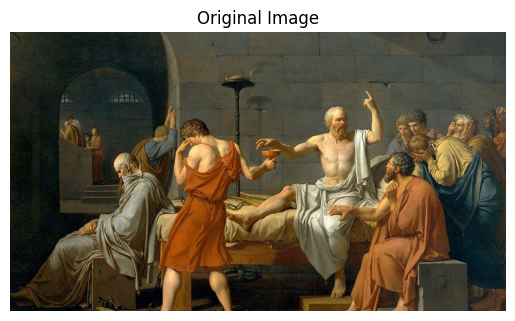

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'image.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    raise ValueError(f"Image not found or unable to load: {image_path}")

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')  # Hide axis
plt.show()


In [40]:
def apply_convolution(image, kernel, stride=1, padding='valid'):
    if padding == 'same':
        pad_size = kernel.shape[0] // 2
        image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')

    # Extract dimensions
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # Determine output dimensions
    outH = (iH - kH) // stride + 1
    outW = (iW - kW) // stride + 1

    # Initialize the output image
    output = np.zeros((outH, outW, image.shape[2]), dtype='float32')

    # Perform convolution
    for y in range(0, iH - kH + 1, stride):
        for x in range(0, iW - kW + 1, stride):
            for c in range(image.shape[2]):
                output[y // stride, x // stride, c] = np.sum(image[y:y + kH, x:x + kW, c] * kernel)

    # Clip the output values to [0, 255] and convert to uint8
    output = np.clip(output, 0, 255).astype('uint8')
    return output


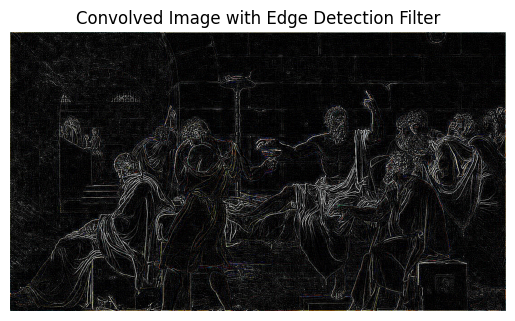

In [41]:
# Define an edge detection filter
edge_filter = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

# Apply convolution with stride 1 and same padding
conv_output = apply_convolution(image_rgb, edge_filter, stride=1, padding='same')

# Display the convolved image
plt.imshow(conv_output)
plt.title('Convolved Image with Edge Detection Filter')
plt.axis('off')  # Hide axis
plt.show()
